# Aprendizado Não supervisionado
> Clusterização : Agrupar dados semelhantes em um mesmo grupo de forma a garantir que os dados do mesmo cluster sejam os mais próximos possíveis e dados de clusters diferentes sejam os mais diferentes possíveis.
> K-means
  - K : Significa o número de grupos a se classificar. Essa variável precisa ser definida, pois impacta no resultado.
  - Etapas :
    - Seleciona aleatoriamente k pontos para servirem como centro dos clusters.
    - Calcula a distância de cada um dos outros pontos de dados a cada um dos centros
    - Atribui cada um dos pontos ao centro mais próximo
    - Com todos os pontos classificados, é gerado um novo centróide baseados nos pontos.
    - Como o novo centróide, é feito a classificação novamente utilizando a distância de cada ponto a esse centróide.
  - Esse processo acontece e se repete até a convergência do modelo. (Quando o centróide para de se movimentar)


# Importando Pacotes e Módulos

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Dataset

In [ ]:
# Dataset Iris
features, labels = load_iris(return_X_y=True, as_frame=True)

In [19]:
# Selecionando apenas as colunas de petalas (petal length e petal width)
print("**Colunas do Dataset de Iris Completo: ", features.columns)
print("Removendo e deixando apenas as colunas de pétalas\n")
features = features.loc[:,['petal length (cm)', 'petal width (cm)']]
print("**Colunas do Dataset de Iris : ", features.columns)

**Colunas do Dataset de Iris Completo:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Removendo e deixando apenas as colunas de pétalas

**Colunas do Dataset de Iris :  Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


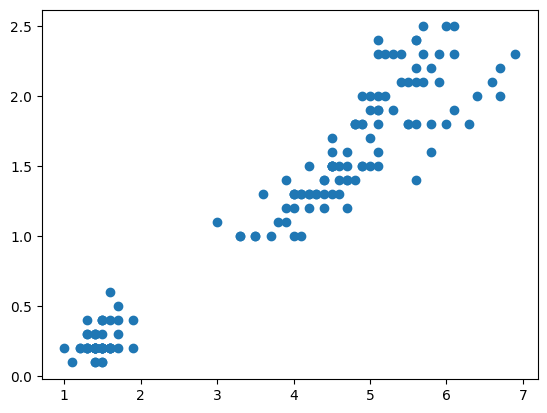

In [20]:
# Visualizando graficamente os pontos
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'])
plt.show()

# Construindo o modelo

In [ ]:
# Utilzando K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(features)

In [33]:
# Labels determinadas pelo k-means
kmeans.labels_


array([ 1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  1, 11,  1,  1,  1, 11,  1,
        1, 11, 11, 11, 11,  1, 11, 11, 11, 11,  1,  1, 11, 11, 11,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11,  1, 11,  1,  1,  1,  7,
        7,  3,  9,  7,  7,  7,  4,  7,  9,  4,  0,  9,  7,  4,  0,  7,  9,
        7,  9,  8,  9,  3,  7,  0,  0,  7,  3,  7,  4,  9,  4,  9,  3,  7,
        7,  7,  0,  9,  9,  0,  7,  9,  4,  0,  0,  0,  0,  4,  9,  2,  8,
        2, 10,  2,  5,  7, 13, 13,  2,  8, 10, 12,  8,  6,  6, 10,  5,  5,
        3, 12,  8,  5,  8, 12, 13,  8,  8, 12, 13, 13,  5, 12,  3, 10,  2,
       12, 10,  8, 12, 12,  6,  8,  2,  2,  6,  8,  8, 12,  8],
      dtype=int32)

# Visualizando graficamente

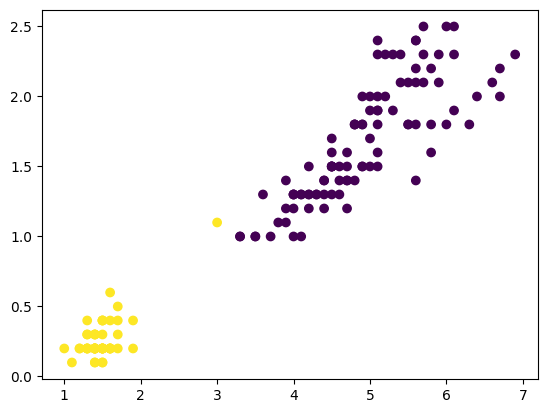

In [23]:
# K = 2
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans.labels_)
plt.show()

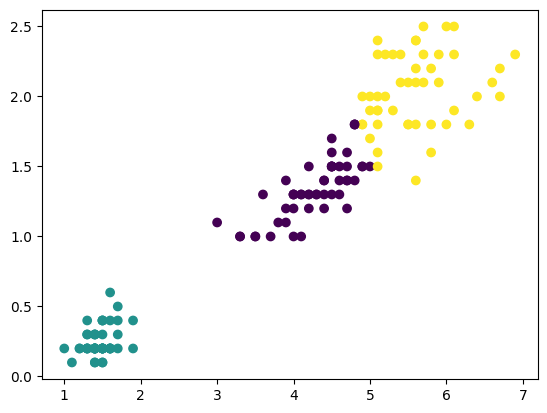

In [24]:
# K = 3
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(features)
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans3.labels_)
plt.show()

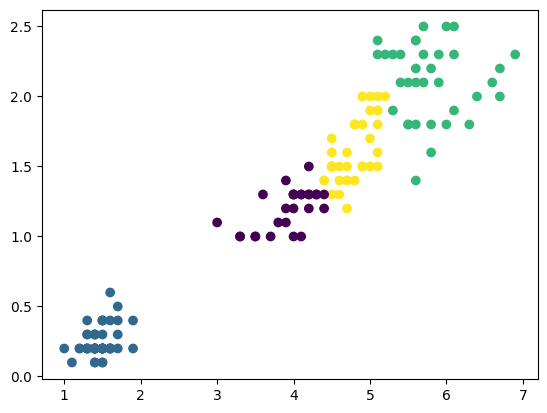

In [25]:
# K = 4
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(features)
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans4.labels_)
plt.show()

# Valor bom para K
> Para determinar o melhor valor de K será usado o métoodo do Cotovelo (Elbow Method).

> Calculamos a inércia (soma dos quadrados das distâncias das amostras ao centro do seu cluster) para diferentes valores de k (número de clusters). Plotamos a inércia em função de k.

> A inércia sempre diminui à medida que k aumenta (mais clusters significa que as amostras estão mais perto de seus centros).

> Procuramos um ponto no gráfico onde a taxa de queda da inércia muda drasticamente - parece um "cotovelo". Esse ponto é sugerido como o número ideal de clusters, pois adicionar mais clusters após esse ponto não reduz significativamente a inércia, sugerindo que a estrutura principal dos dados já foi capturada.


In [26]:
k_values = []
inertias = []

for i in range(1, 15) :
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(features)
  k_values.append(i)
  inertias.append(kmeans.inertia_)

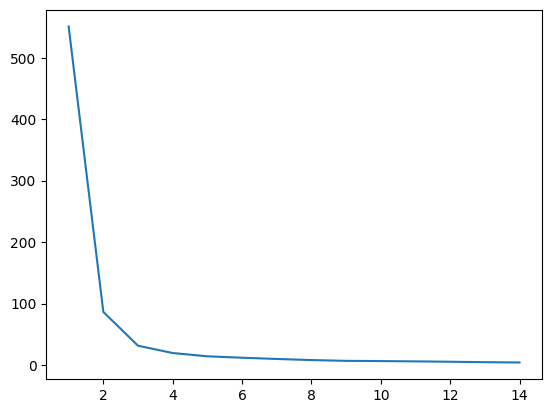

In [27]:
fig, ax = plt.subplots()
ax.plot(k_values, inertias)
plt.show()